In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_excel('/content/NER.xlsx')

In [4]:
data.head()

,Unnamed: 0,Policy,Organization,Country,Topic,Issue
0,0,act,establishment working group,china,Countering Russian Influence Abroad,NaN
1,1,act,NaN,russia,Countering Russian Influence Abroad,NaN
2,0,NaN,russian intelligence,ukraine,Countering Russian Influence Abroad,russian aggression
3,1,NaN,russian government,ukraine,Countering Russian Influence Abroad,security risk
4,2,NaN,NaN,ukraine,Countering Russian Influence Abroad,malign influence activity


In [5]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
data.head()

,Policy,Organization,Country,Topic,Issue
0,act,establishment working group,china,Countering Russian Influence Abroad,NaN
1,act,NaN,russia,Countering Russian Influence Abroad,NaN
2,NaN,russian intelligence,ukraine,Countering Russian Influence Abroad,russian aggression
3,NaN,russian government,ukraine,Countering Russian Influence Abroad,security risk
4,NaN,NaN,ukraine,Countering Russian Influence Abroad,malign influence activity


In [7]:
data['Country'].unique()

array(['china', 'russia', 'ukraine', nan, 'ethiopia', 'ethiopian',
       'nicaragua', 'democratic country', 'america', 'asia',
       'middle east', 'taiwan', 'nation', 'united state', 'chinese state',
       'chinese stateowned', 'russian federation', 'africa', 'georgia',
       'iran', 'neighboring country', 'american', 'american city',
       'syria', 'european country', 'europe', 'latin america',
       'venezuela', 'cuba', 'north korea', 'india', 'postsoviet country',
       'country', 'pacific island nation', 'republic', 'foreign entity',
       'turkey iran', 'nicaraguan', 'honduras', 'haiti', 'bolivia',
       'china russia', 'hong kong', 'oklahoma', 'capitol', 'nasa',
       'chinese communist party', 'certain country', 'belarus',
       'california', 'burma', 'tatmadaw', 'burmese', 'nigeria',
       'eastern democratic republic', 'congo', 'russian',
       'foreign nation', 'eurasia', 'azerbaijan', 'belarus moldova',
       'illinois', 'taliban', 'afghanistan', 'israel', 'ce

In [8]:
df=data['Country'].value_counts().reset_index()

In [9]:
countries=['china', 'russia', 'ukraine', 'ethiopia', 'nicaragua', 'america', 'taiwan', 'georgia', 'iran', 'syria', 'venezuela', 'cuba', 'north korea', 'india', 'turkey', 'honduras', 'haiti', 'bolivia', 'hong kong', 'belarus', 'burma', 'nigeria', 'democratic republic of the congo', 'azerbaijan', 'israel', 'afghanistan', 'canada']

In [10]:
df=df[df['Country'].isin(countries)]

In [11]:
df=df[df['count']>2]

<ipython-input-13-16f802c04dc0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


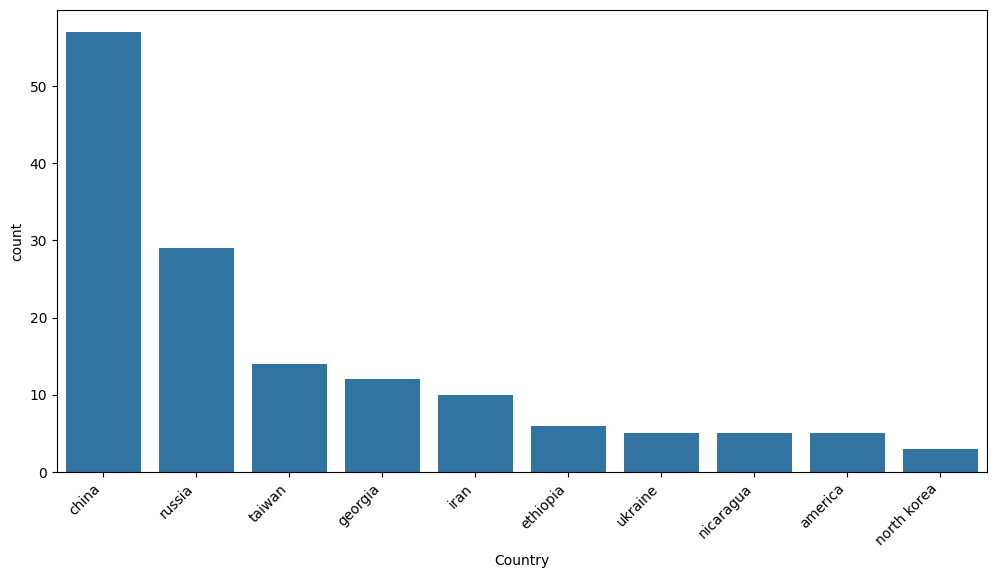

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size horizontally
plt.figure(figsize=(12, 6))

# Assuming df contains columns 'Country' and 'count'
plot = sns.barplot(data=df, x='Country', y='count')

# Rotate the x-axis labels for better visibility
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [14]:
len(data['Issue'].unique())

194

In [15]:
df1=data['Issue'].value_counts().reset_index()

In [16]:
df1=df1[~df1['Issue'].isin(['misinformation','disinformation'])]
df1=df1[df1['count']>5]

In [17]:
df1.head(20)

,Issue,count
2,covid,22
3,covid pandemic,18
4,cyber threat,17
5,pandemic,16
6,domestic terrorism,13
7,cyber attack,11
8,disinformation campaign,10
9,cybersecurity,8
10,vaccine hesitancy,7
11,misinformation disinformation,6


<ipython-input-18-865bc8c3dd95>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


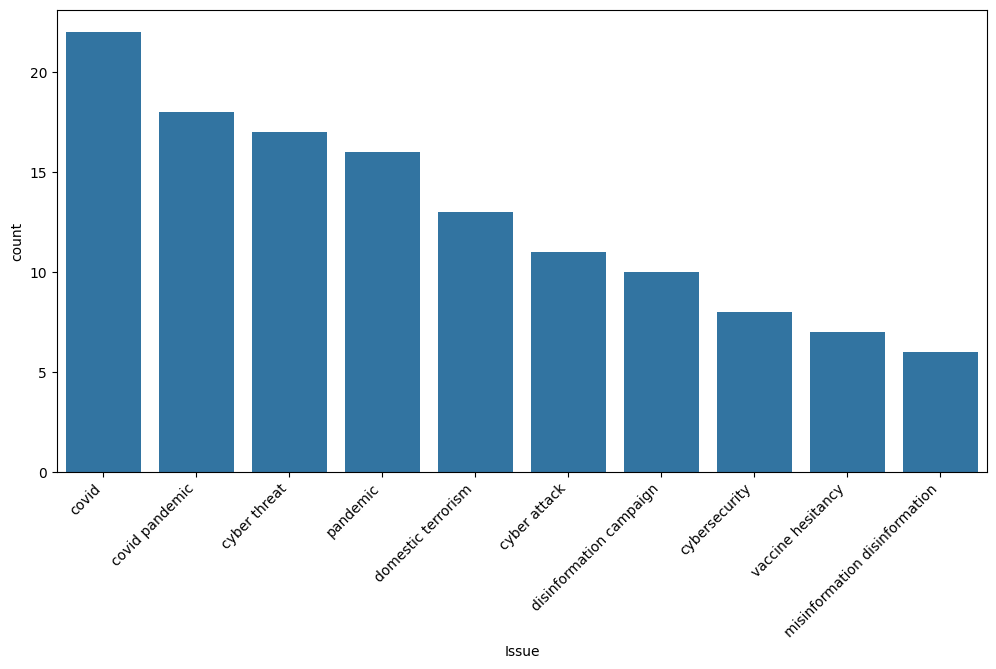

In [18]:
import matplotlib.pyplot as plt

# Increase the figure size horizontally
plt.figure(figsize=(12, 6))

# Assuming df contains columns 'Country' and 'count'
plot = sns.barplot(data=df1, x='Issue', y='count')

# Rotate the x-axis labels for better visibility
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [19]:
data['Organization'].unique()

array(['establishment working group', nan, 'russian intelligence',
       'russian government', 'united state', 'civil society',
       'international coalition', 'united state agency',
       'intelligence community', 'nonintelligence community',
       'activist entity', 'muslim', 'federal election commission',
       'congress', 'arab islam american muslim',
       'arab islamic american muslim community', 'democratic institution',
       'foreign national', 'commission', 'director national intelligence',
       'congressional committee', 'military intelligence', 'president',
       'nonstate actor', 'chinese communist party', 'american alliance',
       'global engagement center', 'nbnas', 'nbna',
       'national biodefense directorate', 'executive agency',
       'government agency', 'private sector partner',
       'house representative', 'establishment select committee',
       'department homeland security', 'intelligence agency',
       'authoritarian regime', 'ccp', 'chinese

In [47]:
data['Country'].groupby(data['Topic']).nunique().reset_index()

,Topic,Country
0,Combating Domestic Terrorism,6
1,Combating Misinformation and Disinformation in...,33
2,Combating Misinformation in Public Health: The...,23
3,Countering Chinese Influence Operations,13
4,Countering Russian Influence Abroad,9
5,Cybersecurity Threats and Evolving Challenges,9
6,Election Integrity and Security,5


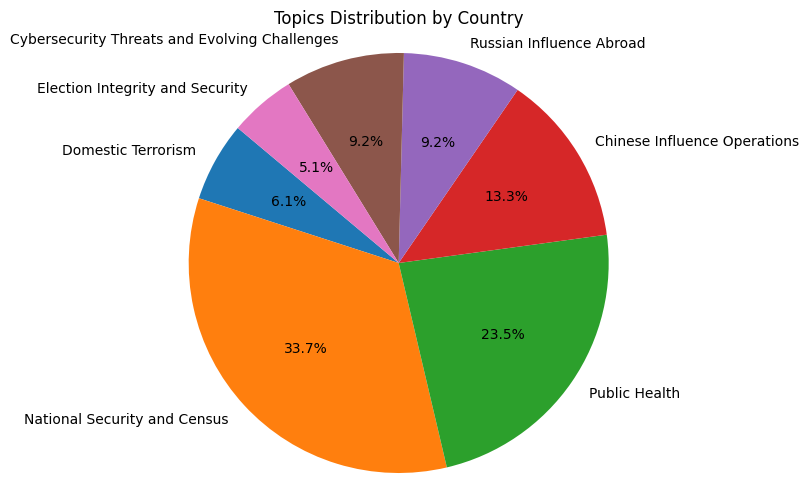

In [49]:
import matplotlib.pyplot as plt

# Data
topics = [
    "Domestic Terrorism",
    "National Security and Census",
    "Public Health",
    "Chinese Influence Operations",
    "Russian Influence Abroad",
    "Cybersecurity Threats and Evolving Challenges",
    "Election Integrity and Security"
]
countries = [6, 33, 23, 13, 9, 9, 5]

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(countries, labels=topics, autopct='%1.1f%%', startangle=140)
plt.title('Topics Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


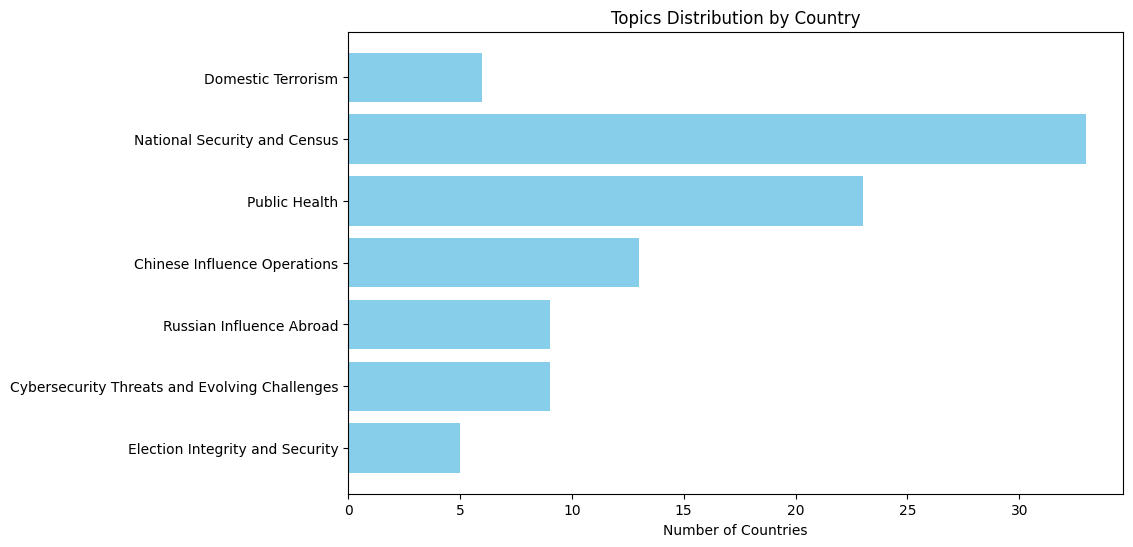

In [50]:
import matplotlib.pyplot as plt

# Data
topics = [
    "Domestic Terrorism",
    "National Security and Census",
    "Public Health",
    "Chinese Influence Operations",
    "Russian Influence Abroad",
    "Cybersecurity Threats and Evolving Challenges",
    "Election Integrity and Security"
]
countries = [6, 33, 23, 13, 9, 9, 5]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(topics, countries, color='skyblue')
plt.xlabel('Number of Countries')
plt.title('Topics Distribution by Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the first topic at the top
plt.show()

In [51]:
data['Issue'].groupby(data['Topic']).nunique().reset_index()

,Topic,Issue
0,Combating Domestic Terrorism,20
1,Combating Misinformation and Disinformation in...,58
2,Combating Misinformation in Public Health: The...,49
3,Countering Chinese Influence Operations,28
4,Countering Russian Influence Abroad,12
5,Cybersecurity Threats and Evolving Challenges,36
6,Election Integrity and Security,36


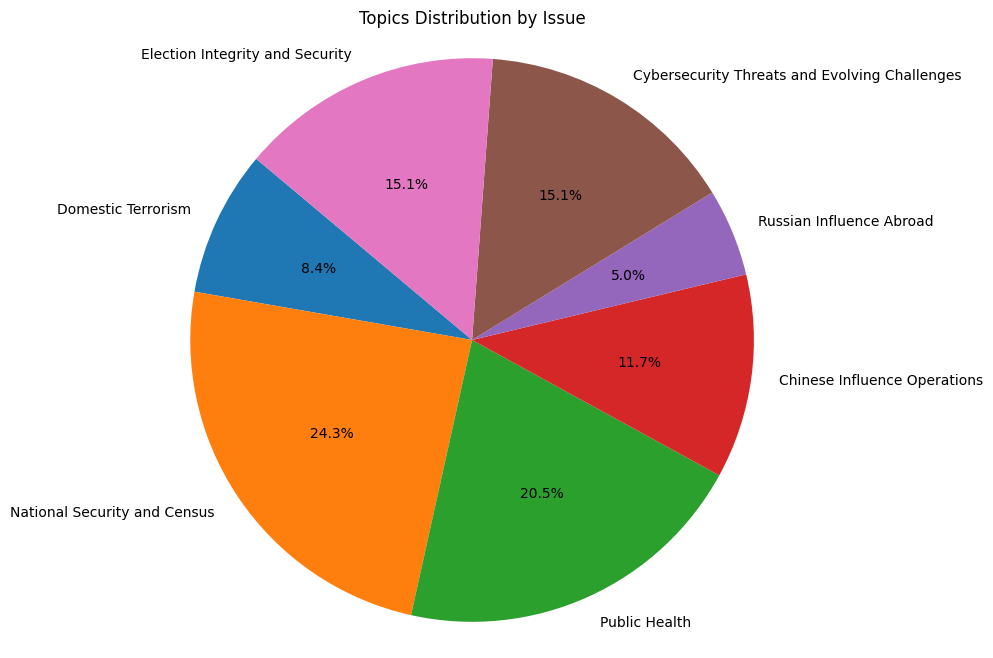

In [53]:
import matplotlib.pyplot as plt

# Data
topics = [
    "Domestic Terrorism",
    "National Security and Census",
    "Public Health",
    "Chinese Influence Operations",
    "Russian Influence Abroad",
    "Cybersecurity Threats and Evolving Challenges",
    "Election Integrity and Security"
]
issues = [20, 58, 49, 28, 12, 36, 36]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(issues, labels=topics, autopct='%1.1f%%', startangle=140)
plt.title('Topics Distribution by Issue')
plt.axis('equal')
plt.show()


In [ ]:
#Combating Domestic Terrorism

In [45]:
len(data[data['Topic']=='Combating Domestic Terrorism']['Organization'].unique())

30

In [ ]:
data[data['Topic']=='Combating Domestic Terrorism']['Issue'].unique()

In [34]:
data1=data[data['Topic']=='Combating Domestic Terrorism']

In [37]:
data1['Issue'].groupby([data1['Topic'],data1['Issue']]).count()

Topic                         Issue                            
Combating Domestic Terrorism  antisemitism                         2
                              civil unrest                         1
                              conspiracy theory                    1
                              covid                                1
                              disinformation                       1
                              disinformation extremism             1
                              domestic extremism                   2
                              domestic terrorism                   9
                              due concern activity                 1
                              false narrative                      1
                              hatred                               1
                              islamophobia                         3
                              issue                                1
                              misinform

In [38]:
data1['Organization'].groupby([data1['Topic'],data1['Organization']]).count()

Topic                         Organization                            
Combating Domestic Terrorism  activist entity                             1
                              antigovernment faction                      1
                              arab islam american muslim                  1
                              arab islamic american muslim community      1
                              attorney general                            1
                              base atomwaffen division                    1
                              congress                                    2
                              department homeland security                1
                              doj                                         1
                              domestic violent extremist group            1
                              establishment select committee              1
                              extremist group                             1
                 

In [31]:
data[data['Topic']=='Combating Domestic Terrorism']['Country'].unique()

array([nan, 'america', 'united state', 'american city', 'turkey iran',
       'capitol', 'canada'], dtype=object)

In [ ]:
#Public Health

In [32]:
data[data['Topic']=='Combating Misinformation in Public Health: The Role of Social Science and Scientific Research']['Issue'].unique()

array(['damage', 'compensatory damage', 'punitive damage', 'covid',
       'misinformation', 'pandemic', 'vaccine hesitancy', 'vaccination',
       'covid pandemic', 'public health crisis', 'misbranded violation',
       'coronavirus', nan, 'ppe', 'covid crisis', 'disinformation',
       'foreign investment disinformation', 'fear', 'exploitation',
       'crisis', 'food insecurity', 'chronic health condition',
       'transparency', 'data manipulation', 'quality issue',
       'covid allegation', 'xenophobia', 'stigma', 'conspiracy theory',
       'historical distrust', 'challenge', 'pandemic concern',
       'public trust', 'concern', 'financial hardship', 'climate change',
       'pressing issue', 'discrimination', 'hate crime',
       'human papillomavirus', 'hpv vaccination',
       'covid vaccination disparity', 'community health disparity',
       'vaccinepreventable disease', 'vaccine', 'mental health issue',
       'drug use', 'youth suicide', 'misinformation campaign',
       

In [39]:
data[data['Topic']=='Combating Misinformation in Public Health: The Role of Social Science and Scientific Research']['Organization'].unique()

array([nan, 'united state agency', 'global engagement center', 'nbnas',
       'nbna', 'chinese communist party', 'ccp',
       'covered health care entity', 'joint select committee',
       'misinformation committee', 'house representative senate',
       'world health organization', 'chinese government',
       'public health official', 'government agency', 'kremlin',
       'german marshall fund', 'president trump', 'local leader',
       'publicprivate partnership', 'social medium platform',
       'transnational criminal organization', 'authoritarian regime',
       'state department', 'medical institution', 'usaid', 'malign actor',
       'civil society organization', 'political influence organization',
       'pharmaceutical industry', 'ranbaxy', 'drug supply chain',
       'administration', 'cdc', 'congress', 'asianamerican business',
       'small business', 'asian business', 'government', 'usaids',
       'coronavirus task force', 'public health effort', 'senator',
       'pu

In [40]:
data[data['Topic']=='Combating Misinformation in Public Health: The Role of Social Science and Scientific Research']['Country'].unique()

array([nan, 'america', 'asia', 'middle east', 'china', 'russia', 'iran',
       'european country', 'latin america', 'venezuela', 'cuba',
       'nicaragua', 'india', 'country', 'oklahoma',
       'chinese communist party', 'certain country', 'belarus', 'nigeria',
       'eastern democratic republic', 'congo', 'nation', 'illinois',
       'united state'], dtype=object)

In [41]:
data1=data[data['Topic']=='Combating Misinformation in Public Health: The Role of Social Science and Scientific Research']

In [42]:
data1.head()

,Policy,Organization,Country,Topic,Issue
15,accountability act,NaN,NaN,Combating Misinformation in Public Health: The...,damage
16,accountability,NaN,NaN,Combating Misinformation in Public Health: The...,compensatory damage
17,NaN,NaN,NaN,Combating Misinformation in Public Health: The...,punitive damage
18,NaN,NaN,NaN,Combating Misinformation in Public Health: The...,damage
19,NaN,NaN,NaN,Combating Misinformation in Public Health: The...,compensatory damage


In [43]:
data1['Issue'].groupby([data1['Topic'],data1['Issue']]).count()

Topic                                                                                          Issue                            
Combating Misinformation in Public Health: The Role of Social Science and Scientific Research  challenge                             2
                                                                                               chronic health condition              1
                                                                                               climate change                        1
                                                                                               community health disparity            1
                                                                                               compensatory damage                   2
                                                                                               concern                               1
                                                             

In [44]:
data1['Organization'].groupby([data1['Topic'],data1['Organization']]).count()

Topic                                                                                          Organization             
Combating Misinformation in Public Health: The Role of Social Science and Scientific Research  administration               4
                                                                                               african youth                2
                                                                                               asian business               1
                                                                                               asianamerican business       1
                                                                                               authoritarian regime         2
                                                                                                                           ..
                                                                                               united state                

In [ ]:
#Countering Chinese Influence Operations